# 主成分分析（Principal Component Analysis, PCA）详解

主成分分析（PCA）是一种经典的**线性降维方法**，广泛应用于数据预处理、特征提取、压缩与可视化。

PCA通过线性变换，将原始数据投影到方差最大的方向上，从而得到一组无关的新特征（主成分）。

---

## 一、核心思想

- 在高维空间中，找到数据方差最大的方向作为第一主成分；
- 在剩余的正交方向上依次寻找方差最大的方向，作为后续主成分；
- 通过保留前 $k$ 个主成分，达到**降维和信息保留**的目的。

---

## 二、数学推导

### 1. 数据中心化

设原始数据矩阵 $X \in \mathbb{R}^{n \times d}$，先进行均值归零：

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$

$$
X_{\text{centered}} = X - \bar{x}
$$

---

### 2. 协方差矩阵

$$
C = \frac{1}{n} X_{\text{centered}}^T X_{\text{centered}}
$$

---

### 3. 特征值分解（Eigen Decomposition）

求解协方差矩阵的特征值与特征向量：

$$
C v_j = \lambda_j v_j
$$

- $\lambda_j$：特征值，表示沿主成分方向的方差大小
- $v_j$：对应的特征向量，表示投影方向

将特征值从大到小排序，选择前 $k$ 个最大特征值对应的特征向量。

---

### 4. 投影变换

原始样本 $x$ 的降维表示：

$$
z = V_k^T \cdot x
$$

其中 $V_k = [v_1, v_2, \ldots, v_k]$。

---

## 三、几何解释

- 第一个主成分：**数据分布方差最大的方向**
- 第二个主成分：在与第一个主成分正交的空间中，方差最大的方向
- 所有主成分两两正交

---

## 四、PCA与SVD的关系

PCA也可通过奇异值分解（SVD）求解：

$$
X_{\text{centered}} = U \Sigma V^T
$$

其中：
- $V$：列为主成分方向
- $\Sigma$：奇异值，对应方差

SVD方法更稳定，常用于大规模数据。

---

## 五、优缺点

### ✅ 优点：
- 简单高效，易解释
- 能去除冗余维度，提升后续模型性能
- 在许多场景下能显著降低计算量

### ❌ 缺点：
- 仅能发现**线性关系**
- 对异常值敏感
- 结果缺乏可解释性（主成分是线性组合）

---

## 六、与其他降维方法对比

| 方法         | 是否线性   | 特点                              |
|--------------|------------|----------------------------------|
| PCA          | 是         | 方差最大方向，特征正交           |
| LDA          | 是         | 最大化类间距（监督学习）         |
| t-SNE        | 否         | 非线性保局部邻域（可视化）       |
| ICA          | 是         | 独立分量（信号分离）             |

---

## 七、Python示例（使用 scikit-learn）

```python
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# PCA降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='Set1')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of Iris Dataset")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# 查看解释方差比例
print("Explained variance ratio:", pca.explained_variance_ratio_)
```

---

## 八、如何选择保留的主成分数量

1. **累积方差解释率**：
   - 常用阈值：90%或95%。
2. **碎石图（Scree Plot）**：
   - 绘制特征值排序曲线，找“拐点”。

```python
import matplotlib.pyplot as plt

pca_full = PCA().fit(X)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()
```

---

## 九、总结

PCA是最常用的线性降维方法，核心要点：
- 通过协方差矩阵的特征分解/奇异值分解求解；
- 最大化投影方差；
- 结果是正交的低维表示。

在特征冗余明显的高维数据中，PCA能显著提高后续机器学习模型的效率和性能。

---

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [17]:
def loaddata():
    data = np.loadtxt('data/pca_data.csv', delimiter=',')
    return  data

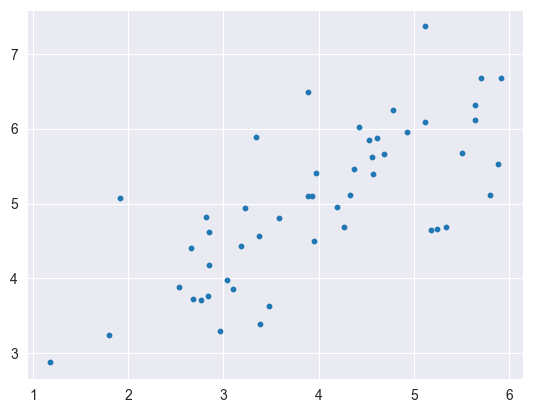

In [18]:
X = loaddata()
plt.scatter(X[:,0], X[:,1],s = 10)
plt.show()

In [19]:
def featureNormalize(X):
    mu = np.mean(X, axis = 0).reshape(1, -1)
    sigma = np.std(X, axis = 0).reshape(1, -1)
    X = (X - mu) / sigma
    return X, mu, sigma

In [20]:
def pca(X,K):
    m = len(X)
    sigma = np.dot(X.T, X)/(m-1)
    eigenvalues, eigenvectors = np.linalg.eig(sigma)
    index = np.argsort(-eigenvalues)#降序排列
    eigenvectors = eigenvectors[:,index]
    u_reduce = eigenvectors[:,:K]#
    return np.dot(X,u_reduce),eigenvectors

In [21]:
X,mu,sigma = featureNormalize(X)
X_reduce,u_reduce = pca(X,1)
X

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677],
       [ 0.50359639,  0.38973079],
       [ 0.32935623,  0.45242294],
       [ 0.17431804, -0.04748911],
       [ 1.08056741, -0.33689741],
       [-0.99325294, -1.21879564],
       [ 1.41742949,  1.2923503 ],
       [ 0.60026548,  0.65385535],
       [-0.98061738, -0.37147508],
       [ 0.96523763,  2.32981886],
       [ 1.02758927, -0.35168199],
       [ 1.47948139,  1.65649752],
       [-0.35270365, -0.19743438],
       [ 1.42096706,  1.10315449],
       [ 0.23612558, -0.30931801],
       [-1.25101023, -1.1038306 ],
       [-0.65914279, -0.05946964],
       [ 0.80965726,  0.93988073],
       [ 1.55321995,  0.10421963],
       [-1.00960756,

In [22]:
X_reduce

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

In [23]:
def recoverData(Z,U,K):#恢复数据
    U_reduce = U[:,:K]
    X_rec = np.dot(Z,np.transpose(U_reduce))
    return X_rec

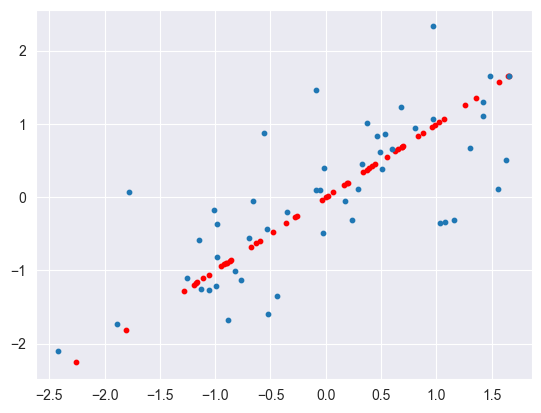

In [25]:
X_rec = recoverData(X_reduce,u_reduce,1)
plt.scatter(X_rec[:,0], X_rec[:,1],s = 10, c = 'r')
plt.scatter(X[:,0], X[:,1],s = 10)
plt.show()